In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 24 19:38:13 2020

@author: sangyuxu
"""
#import all necessary libraries
import EspressoLocomotion
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import locoDataMunger
import locoUtilities
import pandas as pd
import locoPlotters
import espresso as esp
import dabest




# a espressoLocoObject contains a bunch of attributes: 

important attributes include:

.countLogDf: the resampled countLogs from all files

.metaDataDf: the resampled metaData from all files

.outputFolder: a folder created in the original datafolder to dump all the outputs

.resultsDf: a dataframe to collect various summary metrics for all the flies over the course of analysis


important methods include:

.plotChamberSmallMultiples()

.plotBoundedSpeedLines(colorBy, row = None, col = None, rp = '200s', YLim = None) #this also generates 'averageSpeed' and stores it in resultsDf

.plotMeanHeatMaps(binSize = 0.8, row = None, col = None, verbose = False) #this also generates 'LR preference' and 'TB preference' and stores them in resultsDf

.plotContrasts(y, colorBy, compareBy, groupBy = 'Temperature')

In [2]:
#define data path
dataFolderTrhCsCh = '/Users/sangyuxu/xy1/'

# make a TrhCsCh object
# espressoLocoObject = EspressoLocomotion.EspressoLocomotion(dataFolder, startMin, endMin)

TrhCsCh = EspressoLocomotion.EspressoLocomotion(dataFolderTrhCsCh, 0, 120 )


countLog files found: 

['CountLog_2020-06-26_13-13-58.csv']

metadata files found: 

['MetaData_2020-06-26_13-14-00.csv']
CountLog_2020-06-26_13-13-58.csv
MetaData_2020-06-26_13-14-00.csv


2020-06-26_13-13-58


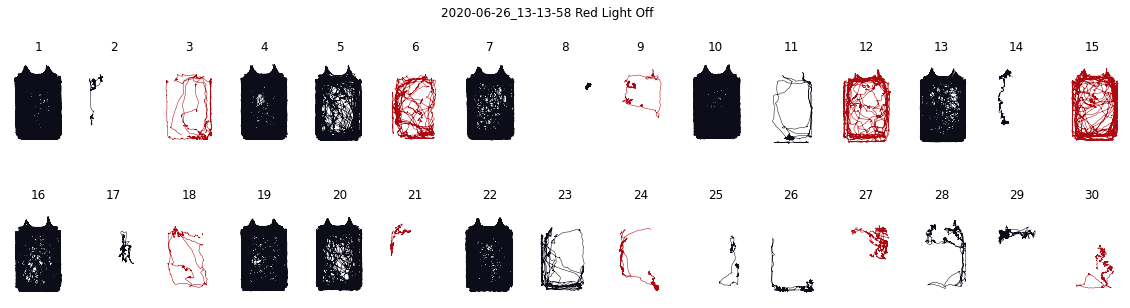

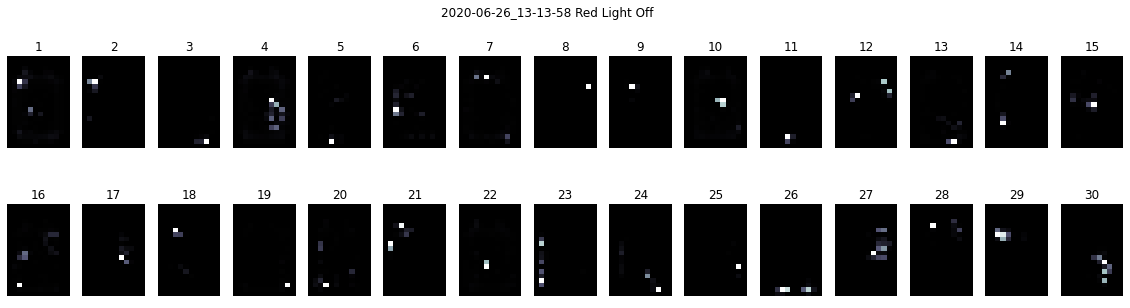

In [3]:
# check small multiples for an overview: colors are automatically assigned if there are csch or acr animals
# espressoLocoObject.plotChamberSmallMultiples(showID = True)

TrhCsCh.plotChamberSmallMultiples()


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


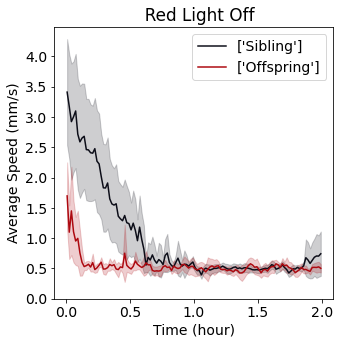

(<Figure size 360x360 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a193a05c0>]],
       dtype=object))

In [4]:
# plot bounded speed lines with ci (std * 1.96)

# espressoLocoObject.plotBoundedSpeedLines(colorBy, row = None, col = None, rp = '200s', YLim = None):

# table outputed is in the format: ((subplot row, subplot column, color series #), (row condition, column condition, color condition))
# row: a column name in metadata. when assigned None, row will be omitted and there will be only one plot for condition fulfilling criteria
# col: same as row
# YLim: can be set to a specific value to coordinate with other plots, or by default left blank, 
# which will leave all the plots in this group to be the same. 
# rp: resampling period: '60s' for 60 seconds between samples, default = 200s


# TrhCsCh.plotBoundedSpeedLines('Status', row = None, col = 'Temperature', rp = '60s', YLim = 4) 
TrhCsCh.plotBoundedSpeedLines('Status', row = None, col = 'Temperature', rp = '60s') 

 


('Red Light Off  Sibling', 'Red Light Off  Offspring')


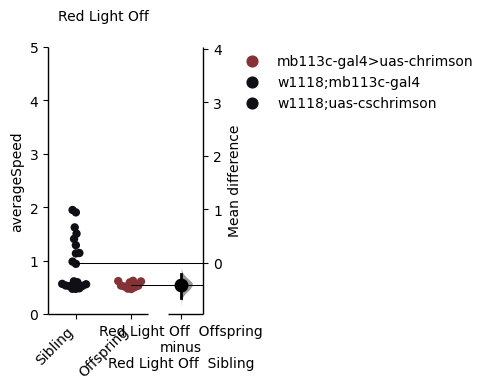

In [12]:
# speed contrast
# espressoLocoObject.plotContrasts(y, colorBy, compareBy, groupBy = 'Temperature'): 


# y: a column in resultsDf 
# groupBy: a column in metadata(and hence in resultsDf)
# compareBy: a column in metadata(and hence in resultsDf)
# colorBy: a column in metadata(and hence in resultsDf), default is 'Genotype'
pk ={'swarm_ylim':(0, 5), 'contrast_ylim':(-2, 2)} # optional kwargs lets you put in whatever dabest can specify in the form of a dictionary


f = TrhCsCh.plotContrasts('averageSpeed', 'Genotype', 'Status', plot_kwargs = pk)


In [ ]:
# mean heatmaps
# espressoLocoObject.plotMeanHeatMaps(binSize = 0.8, row = None, col = None, verbose = False)
# binSize: size of unit square in heatmap
# row: a column in metadata, default value None
# col: a column in metadata, default value None
TrhCsCh.plotMeanHeatMaps(binSize = 0.8, row = 'Temperature', col = 'Genotype')


<Figure size 360x403.2 with 0 Axes>

(('Green Light Off  Sibling', 'Green Light Off  Offspring'), ('Green Light On  Sibling', 'Green Light On  Offspring'))
w1118;uas-dgtacr1
0
0
w1118-mb113c-gal4
1
gal4
mb113c-gal4>uas-acr1
1
gal4
(('Green Light Off  Sibling', 'Green Light Off  Offspring'), ('Green Light On  Sibling', 'Green Light On  Offspring'))
w1118;uas-dgtacr1
0
0
w1118-mb113c-gal4
1
gal4
mb113c-gal4>uas-acr1
1
gal4


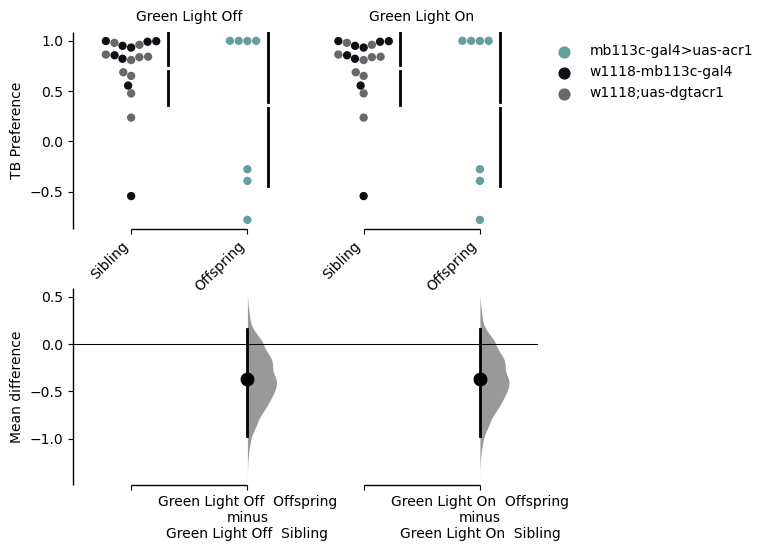

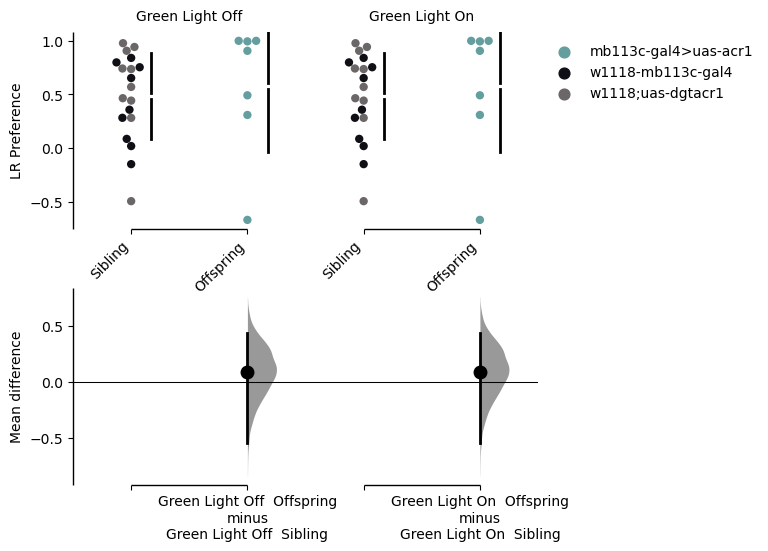

In [15]:
# top preference contrast
TrhCsCh.plotContrasts('TB Preference', 'Genotype', 'Status')


# left preference contrast
TrhCsCh.plotContrasts('LR Preference', 'Genotype', 'Status')
